In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
temp_file = "../Resources/GlobalLandTemperaturesByState.csv"
temp_df = pd.read_csv(temp_file)


In [3]:
start_year = 1743
end_year = 2015

for year in range(start_year, end_year + 1): 
    temp_df.loc[temp_df['dt'].str.contains(str(year)), 'Year'] = str(year)
    
US_temp_df = temp_df[temp_df["Country"] == "United States"]

In [4]:
##Code I was messing around with. Please Ignore -Kenny

#ny_df = temp_df[temp_df['State'] == 'New York']
#ny_df = ny_df.groupby(['Year']).mean()
#first_ny_years = ny_df.iloc[-24] + ny_df.iloc[-23] + ny_df.iloc[-22] 
#second_ny_years = ny_df.iloc[-1] + ny_df.iloc[-2] + ny_df.iloc[-3] 
#print(first_ny_years)
#print(second_ny_years)

#ny_percent_increase = ((1 - (first_ny_years['AverageTemperature']/second_ny_years['AverageTemperature'])) * 100)
#print(f'{ny_percent_increase.round(2)}% increased in temperature in New York')



In [5]:
temp_df['Month'] = temp_df['dt'].str[6:7]

summer_months = temp_df[(temp_df['Month'] >= '6') & (temp_df['Month'] <= '8')]

#find Average Temperature of summer months for New York between certain years

ny_summer = summer_months[(summer_months['State'] == 'New York')]
ny_summer

ny_1990_avg = ny_summer[(ny_summer['Year'] == '1990') ].mean()
ny_1991_avg = ny_summer[(ny_summer['Year'] == '1991') ].mean()
ny_1992_avg = ny_summer[(ny_summer['Year'] == '1992') ].mean()

ny_2011_avg = ny_summer[(ny_summer['Year'] == '2011' )].mean()
ny_2012_avg = ny_summer[(ny_summer['Year'] == '2012' )].mean()
ny_2013_avg = ny_summer[(ny_summer['Year'] == '2013' )].mean()

ny_start_avg = (ny_1990_avg['AverageTemperature'] + ny_1991_avg['AverageTemperature'] + ny_1992_avg['AverageTemperature'])/ 3
ny_end_avg = (ny_2011_avg['AverageTemperature'] + ny_2012_avg['AverageTemperature'] + ny_2013_avg['AverageTemperature'])/ 3


ny_percent_increase = ((1 - (ny_start_avg/ny_end_avg)) * 100).round(3)
print(f'New York experienced a {ny_percent_increase}% in average temperature when comparing July-August 1990-93 to July-August 2011-2013')




New York experienced a 5.121% in average temperature when comparing July-August 1990-93 to July-August 2011-2013


In [6]:
#find Average Temperature of summer months for California between certain years

ca_summer = summer_months[(summer_months['State'] == 'California')]
ca_summer

ca_1990_avg = ca_summer[(ca_summer['Year'] == '1990') ].mean()
ca_1991_avg = ca_summer[(ca_summer['Year'] == '1991') ].mean()
ca_1992_avg = ca_summer[(ca_summer['Year'] == '1992') ].mean()


ca_2013_avg = ca_summer[(ca_summer['Year'] == '2013' )].mean()
ca_2012_avg = ca_summer[(ca_summer['Year'] == '1991') ].mean()
ca_2011_avg = ca_summer[(ca_summer['Year'] == '1992') ].mean()

ca_start_avg = (ca_1990_avg['AverageTemperature'] + ca_1991_avg['AverageTemperature'] + ca_1992_avg['AverageTemperature'])/ 3
ca_end_avg = (ca_2011_avg['AverageTemperature'] + ca_2012_avg['AverageTemperature'] + ca_2013_avg['AverageTemperature'])/ 3


ca_percent_increase = ((1 - (ca_start_avg/ca_end_avg)) * 100).round(3)
print(f'California experienced a {ca_percent_increase}% in average temperature when comparing July-August 1990-93 to July-August 2011-13')


California experienced a 1.32% in average temperature when comparing July-August 1990-93 to July-August 2011-13


In [7]:

#find Average Temperature of summer months for Illinois between certain years

il_summer = summer_months[(summer_months['State'] == 'Illinois')]
il_summer

il_1990_avg = il_summer[(il_summer['Year'] == '1990') ].mean()
il_1991_avg = il_summer[(il_summer['Year'] == '1991') ].mean()
il_1992_avg = il_summer[(il_summer['Year'] == '1992') ].mean()

il_2011_avg = il_summer[(il_summer['Year'] == '2011' )].mean()
il_2012_avg = il_summer[(il_summer['Year'] == '2012' )].mean()
il_2013_avg = il_summer[(il_summer['Year'] == '2013' )].mean()

il_start_avg = (il_1990_avg['AverageTemperature'] + il_1991_avg['AverageTemperature'] + il_1992_avg['AverageTemperature'])/ 3
il_end_avg = (il_2011_avg['AverageTemperature'] + il_2012_avg['AverageTemperature'] + il_2013_avg['AverageTemperature'])/ 3

il_percent_increase = ((1 - (il_start_avg/il_end_avg)) * 100).round(3)
print(f'Illinois experienced a {il_percent_increase}% in average temperature when comparing July-August 1990 to July-August 2013')

#if il_percent_increase < 0: 
 #   il_percent_increase = 0
#else:
 #   il_percent_increase = il_percent_increase


Illinois experienced a 5.006% in average temperature when comparing July-August 1990 to July-August 2013


In [8]:
#plot percentages against each other

states = ['New York', 'California', 'Illinois']
increases = [ny_percent_increase, ca_percent_increase, il_percent_increase]
#plt.bar(states, increases)
#plt.xlabel('States')
#plt.ylabel('% increase')
#plt.title('% change in avg. temp. between Jul-Aug 1990-93 and Jul-Aug 2011-13')

In [17]:
number_of_states = 50
years = 23
avg_temp = []
state_percentages = []
i = 0
j = 0
US_temp_df.sort_values('State')

US_list = US_temp_df['State'].unique().tolist()
year_list = US_temp_df['Year'].unique().tolist()

#year_list = year_list[-24:-1]
#year_list.append('2013')


all_states = US_temp_df.groupby(['State', 'Year']).mean().reset_index()
all_states['AverageTemperature'].value_counts()
#state_info = all_states[(all_states['State'] == (US_list[1]))]
#state_info
#state_year = state_info[(state_info['Year'] == (year_list[-1]))]
#state_year

#temp_df[temp_df]


for i in range(number_of_states + 1):
    #for j in range(years):
        state_info = all_states[(all_states['State'] == (US_list[i]))]
        state_year1 = state_info[(state_info['Year'] == '1990')].mean()
        state_year2 = state_info[(state_info['Year'] == '1991')].mean()
        state_year3 = state_info[(state_info['Year'] == '1992')].mean()
        state_year4 = state_info[(state_info['Year'] == '2011')].mean()
        state_year5 = state_info[(state_info['Year'] == '2012')].mean()
        state_year6 = state_info[(state_info['Year'] == '2013')].mean()
        start_avg = (state_year1['AverageTemperature'] + state_year2['AverageTemperature'] + state_year3['AverageTemperature'])/ 3
        end_avg = (state_year4['AverageTemperature'] + state_year5['AverageTemperature'] + state_year6['AverageTemperature'])/ 3
        
        percentage = ((1 - (start_avg/end_avg)) * 100).round(3)
        state_percentages.append(percentage)
state_percentages
len(US_list)
        

51

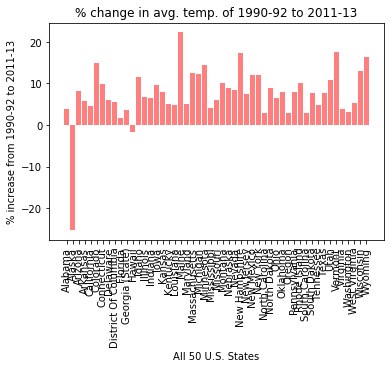

<Figure size 1440x720 with 0 Axes>

In [20]:
plt.bar(US_list, state_percentages, color='r', alpha=0.5, align="center")
plt.xlabel("All 50 U.S. States")
plt.xticks(rotation = 90)
plt.ylabel(f'% increase from 1990-92 to 2011-13')
plt.title('% change in avg. temp. of 1990-92 to 2011-13')
#plt.xlim(-0.75, len(US_list)-20)
fig =plt.figure(figsize = (20,10))
fig.savefig("output_data/temp_percentages.png")